In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

!pip install plotly
import plotly.express as px

!pip install dataprep
from dataprep.eda import create_report

!pip install h2o
import h2o
from h2o.automl import H2OAutoML

     |████████████████████████████████| 1.8 MB 6.6 MB/s 
     |████████████████████████████████| 50 kB 9.0 MB/s 
     |████████████████████████████████| 10.1 MB 21.3 MB/s 
     |████████████████████████████████| 1.5 MB 35.9 MB/s 
     |████████████████████████████████| 1.3 MB 47.0 MB/s 
     |████████████████████████████████| 719 kB 50.3 MB/s 
     |████████████████████████████████| 63 kB 3.6 MB/s 
     |████████████████████████████████| 848 kB 57.0 MB/s 
     |████████████████████████████████| 366 kB 53.3 MB/s 
     |████████████████████████████████| 271 kB 49.8 MB/s 
     |████████████████████████████████| 160 kB 57.8 MB/s 
     |████████████████████████████████| 125 kB 69.6 MB/s 
     |████████████████████████████████| 49 kB 8.2 MB/s 
     |████████████████████████████████| 743 kB 22.5 MB/s 
  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13919 sha256=411b3e1989a3cb8c5c861a3efdf8db85f4a8ec1ca56b1758058039f4e68f5c19
  Stored in directory: /root/.cache/pip/

NumExpr defaulting to 2 threads.


     |████████████████████████████████| 175.8 MB 19 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.3-py2.py3-none-any.whl size=175832480 sha256=f13193e184090356118d2a2f7a802432fbd31a705eb2b743e9e7022a8314be4a
  Stored in directory: /root/.cache/pip/wheels/2a/52/cf/01f6938288f0731963463ff72510db67f9f3076f801038b2f7
Successfully built h2o


In [2]:
#read data
cancer_df = pd.read_csv('cervical_cancer.csv')

In [3]:
#preview
cancer_df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

In [4]:
#info
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
#statistics
cancer_df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#replace '?' with NaN 
cancer_df = cancer_df.replace('?', np.nan)
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [7]:
#look at null
cancer_df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

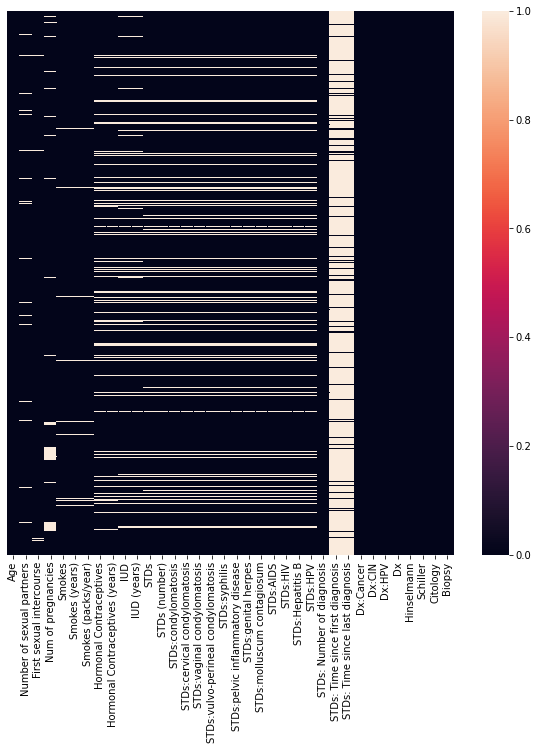

In [8]:
#plot heatmap for all locations that have null values
plt.figure(figsize = (10, 10))
sns.heatmap(cancer_df.isnull(), yticklabels=False)

In [9]:
#since STDs: Time since first diagnosis  and STDs: Time since last diagnosis have more than 80% missing values 
#we can drop them
cancer_df = cancer_df.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


In [10]:
#since most of the column types are object, we are not able to get the statistics of the dataframe.
#convert them to numeric type
cancer_df = cancer_df.apply(pd.to_numeric)
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [11]:
#statistics of the dataframe
cancer_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,741.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,0.514804,0.104914,0.176627,0.058433,0.0,0.005312,0.057105,0.023904,0.001328,0.001328,0.001328,0.0,0.023904,0.001328,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,1.943089,0.306646,0.561993,0.234716,0.0,0.072739,0.232197,0.152853,0.036442,0.036442,0.036442,0.0,0.152853,0.036442,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#get average
cancer_df.mean()

Age                                   26.820513
Number of sexual partners              2.527644
First sexual intercourse              16.995300
Num of pregnancies                     2.275561
Smokes                                 0.145562
Smokes (years)                         1.219721
Smokes (packs/year)                    0.453144
Hormonal Contraceptives                0.641333
Hormonal Contraceptives (years)        2.256419
IUD                                    0.112011
IUD (years)                            0.514804
STDs                                   0.104914
STDs (number)                          0.176627
STDs:condylomatosis                    0.058433
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005312
STDs:vulvo-perineal condylomatosis     0.057105
STDs:syphilis                          0.023904
STDs:pelvic inflammatory disease       0.001328
STDs:genital herpes                    0.001328
STDs:molluscum contagiosum             0

In [13]:
#replace null values with mean
cancer_df = cancer_df.fillna(cancer_df.mean())
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


# Data Visualization

In [14]:
#correlation matrix
corr = cancer_df.corr()
corr

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.084896,0.369168,0.526137,0.055813,0.217349,0.131180,0.065624,0.277181,0.267662,0.205886,0.010017,-0.015488,-0.025012,NaN,0.006220,-0.022614,0.010442,0.023216,-0.029076,-0.000919,NaN,-0.002025,-0.029076,0.038546,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.084896,1.000000,-0.147937,0.076719,0.238078,0.177117,0.175153,0.006342,0.018552,0.030005,0.004215,0.053754,0.039359,0.034646,NaN,-0.042924,0.036750,0.027178,0.030616,-0.031826,0.030616,NaN,0.019871,-0.011012,0.013871,0.051559,0.022309,0.015691,0.027264,0.022982,-0.039273,-0.008899,0.021839,-0.001429
First sexual intercourse,0.369168,-0.147937,1.000000,-0.058223,-0.123602,-0.058366,-0.056332,0.018344,0.008000,-0.020975,-0.024803,-0.013133,0.006487,0.026777,NaN,0.071425,0.031082,-0.100999,-0.001089,0.023398,-0.013332,NaN,-0.013430,0.011154,0.033112,-0.013327,0.067283,-0.032626,0.043966,0.035750,-0.016546,0.003493,-0.010971,0.007262
Num of pregnancies,0.526137,0.076719,-0.058223,1.000000,0.080768,0.174912,0.097044,0.142858,0.207839,0.198550,0.143642,0.044250,0.001706,-0.037999,NaN,-0.003166,-0.037204,0.141728,-0.056542,-0.032114,0.041168,NaN,0.009384,-0.032114,-0.028162,0.033514,0.035123,0.007344,0.046753,0.019025,0.038685,0.087687,-0.029656,0.043460
Smokes,0.055813,0.238078,-0.123602,0.080768,1.000000,0.723128,0.493361,-0.002165,0.044157,-0.051184,-0.032996,0.116676,0.105811,0.059919,NaN,0.069631,0.062775,0.082684,-0.014059,-0.014059,-0.014059,NaN,0.059412,0.083551,0.049171,0.095433,-0.011027,-0.042822,0.012210,-0.067614,0.034527,0.053613,-0.003913,0.029091
Smokes (years),0.217349,0.177117,-0.058366,0.174912,0.723128,1.000000,0.724116,-0.011002,0.048899,0.027562,0.037900,0.091611,0.091313,0.045397,NaN,0.114332,0.047511,0.015393,-0.010337,-0.010337,-0.010337,NaN,0.090636,0.099170,0.050935,0.081676,0.054674,-0.030966,0.057214,-0.048894,0.071232,0.094640,-0.006750,0.061484
Smokes (packs/year),0.131180,0.175153,-0.056332,0.097044,0.493361,0.724116,1.000000,0.005880,0.040112,0.007891,0.015912,0.029372,0.030780,0.007917,NaN,0.041412,0.009130,-0.003277,-0.007180,-0.007180,-0.007180,NaN,0.054577,0.101105,-0.008410,0.032186,0.108476,-0.021127,0.110366,-0.033358,0.026662,0.017954,0.004613,0.024657
Hormonal Contraceptives,0.065624,0.006342,0.018344,0.142858,-0.002165,-0.011002,0.005880,1.000000,0.448574,0.033729,-0.033752,-0.032105,-0.038088,-0.009284,NaN,-0.059222,-0.013714,-0.003624,0.027587,0.027587,-0.048598,NaN,-0.076278,-0.048598,0.039040,-0.050660,0.026407,-0.003334,0.038038,-0.001723,0.033551,-0.004247,-0.011030,0.007711
Hormonal Contraceptives (years),0.277181,0.018552,0.008000,0.207839,0.044157,0.048899,0.040112,0.448574,1.000000,0.094953,0.000455,0.000829,-0.006468,0.007752,NaN,-0.038207,0.009685,0.003897,-0.014209,-0.019065,-0.021494,NaN,-0.035472,-0.021494,0.052059,-0.037219,0.054627,0.003086,0.061394,-0.012865,0.038825,0.078707,0.074324,0.078995
IUD,0.267662,0.030005,-0.020975,0.198550,-0.051184,0.027562,0.007891,0.033729,0.094953,1.000000,0.746478,0.053859,0.053146,0.077262,NaN,0.032093,0.061867,-0.022311,-0.013125,-0.013125,-0.013125,NaN,0.008590,-0.013125,-0.018574,0.029871,0.110541,0.051833,0.058154,0.138905,0.044059,0.084074,0.007348,0.051554


In [15]:
#create report
report = create_report(cancer_df, title='My Report')
report

# Train H2O AutoML

In [34]:
#initiate
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,9 mins 39 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_t2rhzt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.151 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [36]:
#convert pandas df into h2o frame
h2o_df = h2o.H2OFrame(cancer_df)

#preview
h2o_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
18,4,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,1,16.9953,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52,5,16,4,1,37,37,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
46,3,21,4,0,0,0,1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42,3,23,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51,3,17,6,1,34,3.4,0,0,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
26,1,26,3,0,0,0,1,2,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45,1,20,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
44,3,15,2.27556,1,1.26697,2.8,0,0,0.112011,0.514804,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
#statistics
h2o_df.describe()

Rows:858
Cols:34




,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,real,real,real,real,real,int,real,real,real,int,int,int,int,int,int,int,int,int
mins,13.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,26.82051282051281,2.527644230769229,16.99529964747356,2.2755610972568596,0.1455621301775149,1.2197214125857974,0.45314395064923096,0.6413333333333339,2.2564192013893347,0.11201079622132265,0.5148043184885296,0.10491367861885777,0.17662682602921645,0.05843293492695881,0.0,0.005312084993359892,0.057104913678618904,0.023904382470119518,0.0013280212483399733,0.0013280212483399723,0.0013280212483399733,0.0,0.02390438247011952,0.0013280212483399727,0.0026560424966799467,0.08741258741258745,0.02097902097902098,0.01048951048951049,0.02097902097902098,0.027972027972027972,0.04079254079254079,0.08624708624708624,0.05128205128205128,0.0641025641025641
maxs,84.0,28.0,32.0,11.0,1.0,37.0,37.0,1.0,30.0,1.0,19.0,1.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
sigma,8.497948065482602,1.6422670468948033,2.7918829667636307,1.399325140522659,0.3501889104921777,4.057884876966794,2.2096573290995956,0.4486706238053575,3.5190818172926286,0.29325976218008654,1.8055854274592453,0.28724706166127123,0.5264404943519086,0.21986776248292073,0.0,0.06813699958037694,0.2175081342429894,0.14318318641611819,0.034136659577812506,0.03413665957781252,0.03413665957781251,0.0,0.14318318641611827,0.03413665957781252,0.04824441751620589,0.3025447418507477,0.1433975861165658,0.1019391586774784,0.1433975861165658,0.1649888484215437,0.1979246496661347,0.2808923013686258,0.22070109393249174,0.24507841474716066
zeros,0,0,0,16,722,722,722,269,269,658,658,674,674,709,858,749,710,735,752,752,752,858,735,752,751,787,840,849,840,834,823,784,814,803
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,16.995299647473562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#split train and test sets
train, test, validation = h2o_df.split_frame(ratios=[0.70, 0.15], seed=121)

In [42]:
#define X and y
X = train.columns
y = 'Biopsy'
X.remove(y)

In [44]:
#for binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [46]:
X

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology']

In [47]:
y

'Biopsy'

In [48]:
#initiate
aml = H2OAutoML(balance_classes=True,
                stopping_metric='AUC',     #for classification
                seed=121,
                max_models=20)

#train
aml.train(x=X, 
          y=y, 
          training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_4_AutoML_2_20211009_225711


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,24.0,24.0,16778.0,9.0,10.0,9.958333,21.0,65.0,50.666668




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.14111053333107826
RMSE: 0.3756468199400579
LogLoss: 0.3831715385694413
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27500274699553584: 


,,0,1,Error,Rate
0,0,551.0,0.0,0.0,(0.0/551.0)
1,1,0.0,549.0,0.0,(0.0/549.0)
2,Total,551.0,549.0,0.0,(0.0/1100.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.275003,1.000000,37.0
1,max f2,0.275003,1.000000,37.0
2,max f0point5,0.275003,1.000000,37.0
3,max accuracy,0.275003,1.000000,37.0
4,max precision,0.578938,1.000000,0.0
5,max recall,0.275003,1.000000,37.0
6,max specificity,0.578938,1.000000,0.0
7,max absolute_mcc,0.275003,1.000000,37.0
8,max min_per_class_accuracy,0.275003,1.000000,37.0
9,max mean_per_class_accuracy,0.275003,1.000000,37.0



Gains/Lift Table: Avg response rate: 49.91 %, avg score: 23.95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013636,0.578938,2.003643,2.003643,1.00,0.578938,1.000000,0.578938,0.027322,0.027322,100.364299,100.364299,0.027322
1,2,0.026364,0.557219,2.003643,2.003643,1.00,0.557219,1.000000,0.568453,0.025501,0.052823,100.364299,100.364299,0.052823
2,3,0.040000,0.557122,2.003643,2.003643,1.00,0.557122,1.000000,0.564590,0.027322,0.080146,100.364299,100.364299,0.080146
3,4,0.040000,0.550738,0.000000,2.003643,0.00,0.000000,1.000000,0.564590,0.000000,0.080146,-100.000000,100.364299,0.080146
4,5,0.053636,0.550472,2.003643,2.003643,1.00,0.550472,1.000000,0.561001,0.027322,0.107468,100.364299,100.364299,0.107468
5,6,0.107273,0.525589,2.003643,2.003643,1.00,0.536441,1.000000,0.548721,0.107468,0.214936,100.364299,100.364299,0.214936
6,7,0.160000,0.509908,2.003643,2.003643,1.00,0.514129,1.000000,0.537321,0.105647,0.320583,100.364299,100.364299,0.320583
7,8,0.212727,0.488970,2.003643,2.003643,1.00,0.498310,1.000000,0.527652,0.105647,0.426230,100.364299,100.364299,0.426230
8,9,0.306364,0.465448,2.003643,2.003643,1.00,0.474658,1.000000,0.511455,0.187614,0.613843,100.364299,100.364299,0.613843
9,10,0.409091,0.443158,2.003643,2.003643,1.00,0.452792,1.000000,0.496724,0.205829,0.819672,100.364299,100.364299,0.819672




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.04309542204591964
RMSE: 0.20759436901303377
LogLoss: 0.14730541543066863
Mean Per-Class Error: 0.09981851179673318
AUC: 0.9397745725475212
AUCPR: 0.5813155127674022
Gini: 0.8795491450950423

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07037983869489269: 


,,0,1,Error,Rate
0,0,528.0,23.0,0.0417,(23.0/551.0)
1,1,6.0,32.0,0.1579,(6.0/38.0)
2,Total,534.0,55.0,0.0492,(29.0/589.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.070380,0.688172,54.0
1,max f2,0.070380,0.772947,54.0
2,max f0point5,0.162272,0.631579,37.0
3,max accuracy,0.162272,0.952462,37.0
4,max precision,0.463841,0.833333,5.0
5,max recall,0.002815,1.000000,324.0
6,max specificity,0.547378,0.998185,0.0
7,max absolute_mcc,0.070380,0.675776,54.0
8,max min_per_class_accuracy,0.009571,0.885662,95.0
9,max mean_per_class_accuracy,0.070380,0.900181,54.0



Gains/Lift Table: Avg response rate:  6.45 %, avg score:  2.81 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010187,0.438726,12.916667,12.916667,0.833333,0.492259,0.833333,0.492259,0.131579,0.131579,1191.666667,1191.666667,0.129764
1,2,0.020374,0.365525,7.750000,10.333333,0.500000,0.412924,0.666667,0.452592,0.078947,0.210526,675.000000,933.333333,0.203267
2,3,0.030560,0.302880,10.333333,10.333333,0.666667,0.338748,0.666667,0.414644,0.105263,0.315789,933.333333,933.333333,0.304900
3,4,0.040747,0.261541,10.333333,10.333333,0.666667,0.286713,0.666667,0.382661,0.105263,0.421053,933.333333,933.333333,0.406534
4,5,0.050934,0.209086,5.166667,9.300000,0.333333,0.229086,0.600000,0.351946,0.052632,0.473684,416.666667,830.000000,0.451906
5,6,0.100170,0.034352,7.482759,8.406780,0.482759,0.117167,0.542373,0.236546,0.368421,0.842105,648.275862,740.677966,0.793103
6,7,0.151104,0.010729,0.516667,5.747191,0.033333,0.018967,0.370787,0.163205,0.026316,0.868421,-48.333333,474.719101,0.766788
7,8,0.200340,0.007311,1.068966,4.597458,0.068966,0.008612,0.296610,0.125212,0.052632,0.921053,6.896552,359.745763,0.770417
8,9,0.300509,0.005196,0.262712,3.152542,0.016949,0.005895,0.203390,0.085439,0.026316,0.947368,-73.728814,215.254237,0.691470
9,10,0.400679,0.004526,0.000000,2.364407,0.000000,0.004823,0.152542,0.065285,0.000000,0.947368,-100.000000,136.440678,0.584392




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.957526,0.015991,0.974576,0.966102,0.966102,0.940678,0.940171
1,auc,0.921595,0.053564,0.982609,0.977778,0.879022,0.883792,0.884774
2,err,0.042474,0.015991,0.025424,0.033898,0.033898,0.059322,0.059829
3,err_count,5.000000,1.870829,3.000000,4.000000,4.000000,7.000000,7.000000
4,f0point5,0.650739,0.082676,0.555556,0.757576,0.714286,0.612245,0.614035
5,f1,0.702506,0.078826,0.666667,0.833333,0.714286,0.631579,0.666667
6,f2,0.770977,0.108367,0.833333,0.925926,0.714286,0.652174,0.729167
7,lift_top_group,11.095873,6.621638,19.666666,5.900000,16.857143,6.555555,6.500000
8,logloss,0.159535,0.079786,0.052143,0.151659,0.122280,0.256394,0.215197
9,max_per_class_error,0.180879,0.141945,0.026087,0.037037,0.285714,0.333333,0.222222



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-10-09 22:57:30,1.842 sec,0.0,0.662461,1.401335,0.500000,0.499091,1.000000,0.500909
1,,2021-10-09 22:57:30,1.904 sec,5.0,0.617548,1.050831,0.999260,0.999241,2.003643,0.006364
2,,2021-10-09 22:57:30,1.957 sec,10.0,0.560359,0.798145,1.000000,1.000000,2.003643,0.000000
3,,2021-10-09 22:57:30,2.009 sec,15.0,0.498531,0.619073,0.999954,0.999953,2.003643,0.000909
4,,2021-10-09 22:57:30,2.075 sec,20.0,0.430464,0.475731,1.000000,1.000000,2.003643,0.000000
5,,2021-10-09 22:57:30,2.116 sec,24.0,0.375647,0.383172,1.000000,1.000000,2.003643,0.000000



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Schiller,644.672302,1.000000,0.502122
1,Hinselmann,120.616058,0.187097,0.093945
2,Citology,99.177742,0.153842,0.077247
3,First sexual intercourse,75.592575,0.117257,0.058877
4,Age,67.026886,0.103970,0.052206
5,Num of pregnancies,56.332150,0.087381,0.043876
6,Hormonal Contraceptives (years),48.283989,0.074897,0.037607
7,STDs:genital herpes,25.997328,0.040326,0.020249
8,Number of sexual partners,25.454042,0.039484,0.019826
9,Hormonal Contraceptives,22.764769,0.035312,0.017731



See the whole table with table.as_data_frame()


# Leaderboard Exploration

In [49]:
#leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_4_AutoML_2_20211009_225711,0.939775,0.147305,0.581316,0.0998185,0.207594,0.0430954
StackedEnsemble_BestOfFamily_8_AutoML_2_20211009_225711,0.93956,0.130135,0.482429,0.110254,0.19506,0.0380485
StackedEnsemble_BestOfFamily_5_AutoML_2_20211009_225711,0.937816,0.117111,0.557321,0.0970962,0.181933,0.0330997
GBM_2_AutoML_2_20211009_225711,0.934593,0.154238,0.571732,0.13294,0.212254,0.0450517
StackedEnsemble_AllModels_6_AutoML_2_20211009_225711,0.927548,0.152654,0.472135,0.160163,0.204312,0.0417432
StackedEnsemble_BestOfFamily_6_AutoML_2_20211009_225711,0.927094,0.158975,0.625433,0.121143,0.205254,0.0421292
GBM_grid_1_AutoML_2_20211009_225711_model_1,0.92707,0.152481,0.596966,0.12931,0.213777,0.0457008
DRF_1_AutoML_2_20211009_225711,0.921077,0.242889,0.549038,0.114791,0.228855,0.0523746
XGBoost_2_AutoML_2_20211009_225711,0.920002,0.120164,0.495231,0.0961887,0.182309,0.0332364
StackedEnsemble_BestOfFamily_2_AutoML_2_20211009_225711,0.919023,0.120214,0.522068,0.0970962,0.18084,0.0327032


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_4_AutoML_2_20211009_225711,0.939775,0.147305,0.581316,0.0998185,0.207594,0.0430954,284,0.017169,GBM
StackedEnsemble_BestOfFamily_8_AutoML_2_20211009_225711,0.93956,0.130135,0.482429,0.110254,0.19506,0.0380485,2887,0.06576,StackedEnsemble
StackedEnsemble_BestOfFamily_5_AutoML_2_20211009_225711,0.937816,0.117111,0.557321,0.0970962,0.181933,0.0330997,361,0.056626,StackedEnsemble
GBM_2_AutoML_2_20211009_225711,0.934593,0.154238,0.571732,0.13294,0.212254,0.0450517,225,0.013639,GBM
StackedEnsemble_AllModels_6_AutoML_2_20211009_225711,0.927548,0.152654,0.472135,0.160163,0.204312,0.0417432,3699,0.16013,StackedEnsemble
StackedEnsemble_BestOfFamily_6_AutoML_2_20211009_225711,0.927094,0.158975,0.625433,0.121143,0.205254,0.0421292,5670,0.065985,StackedEnsemble
GBM_grid_1_AutoML_2_20211009_225711_model_1,0.92707,0.152481,0.596966,0.12931,0.213777,0.0457008,120,0.013439,GBM
DRF_1_AutoML_2_20211009_225711,0.921077,0.242889,0.549038,0.114791,0.228855,0.0523746,179,0.013508,DRF
XGBoost_2_AutoML_2_20211009_225711,0.920002,0.120164,0.495231,0.0961887,0.182309,0.0332364,325,0.0193,XGBoost
StackedEnsemble_BestOfFamily_2_AutoML_2_20211009_225711,0.919023,0.120214,0.522068,0.0970962,0.18084,0.0327032,440,0.03927,StackedEnsemble


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_4_AutoML_2_20211009_225711


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.08124468975451567: 


,,0,1,Error,Rate
0,0,125.0,3.0,0.0234,(3.0/128.0)
1,1,0.0,9.0,0.0,(0.0/9.0)
2,Total,125.0,12.0,0.0219,(3.0/137.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

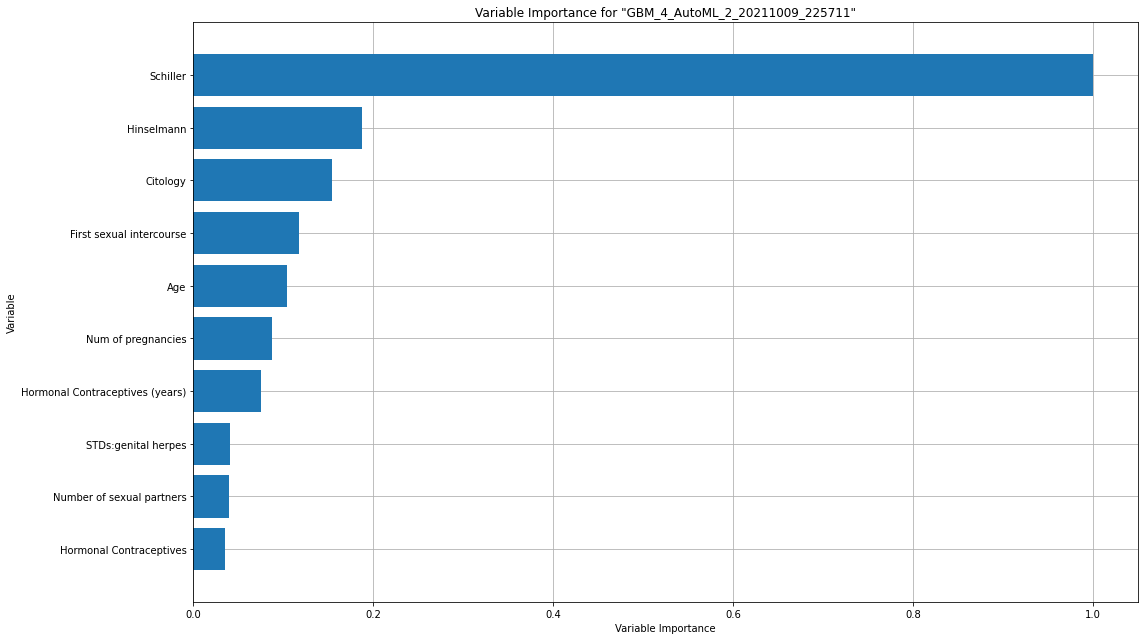

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

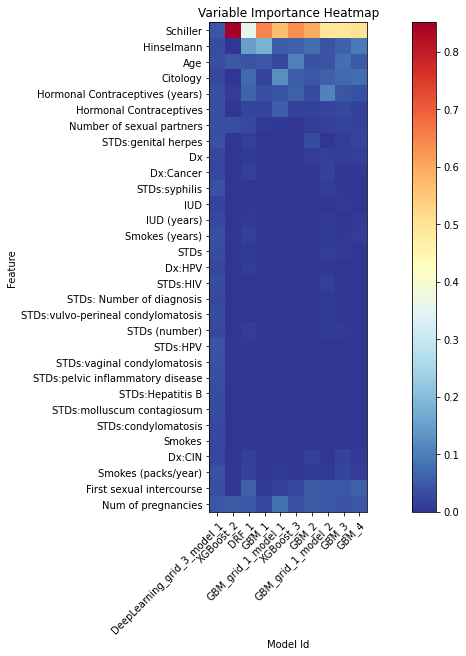

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

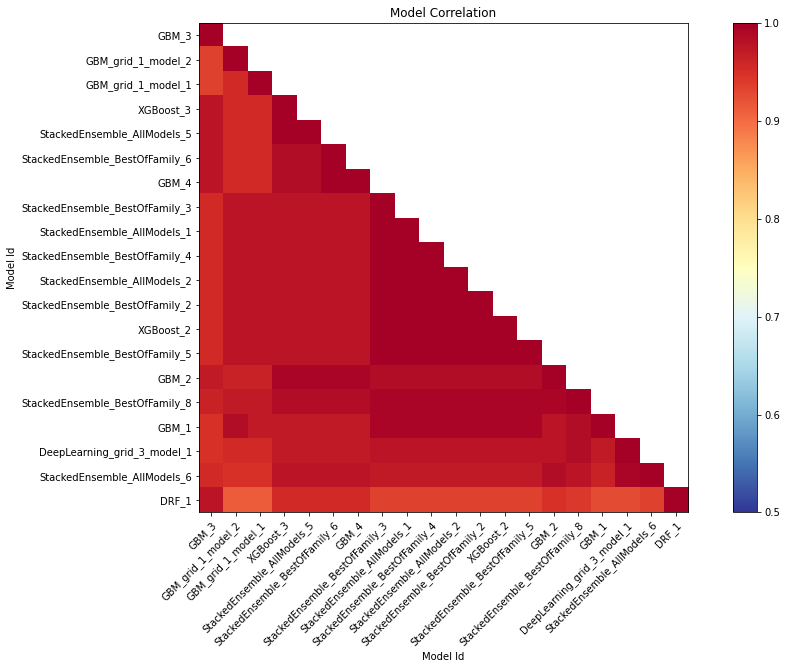

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

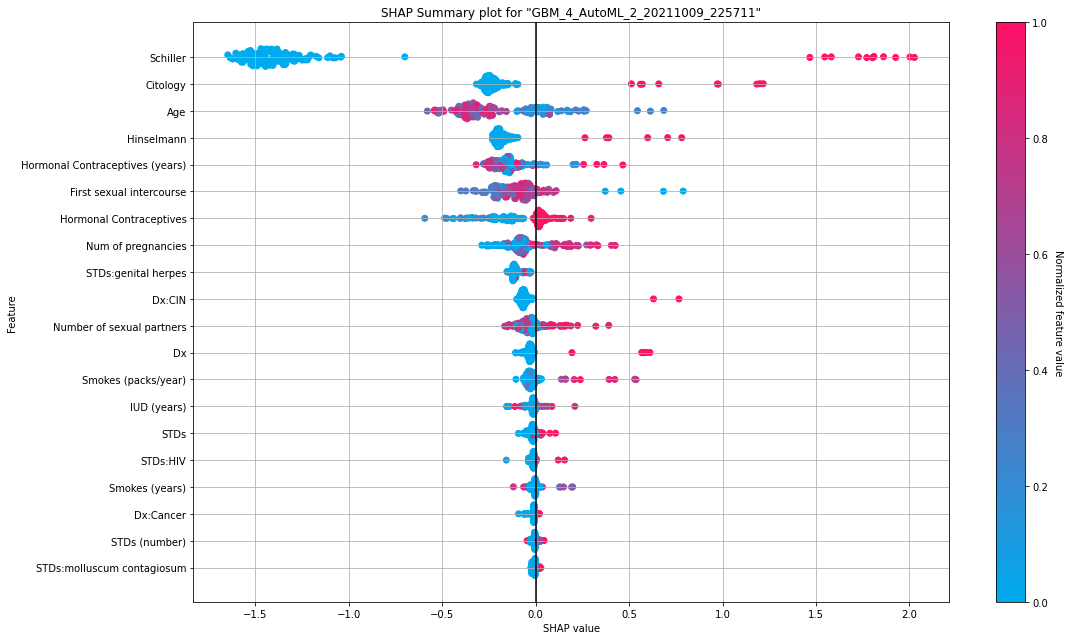

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

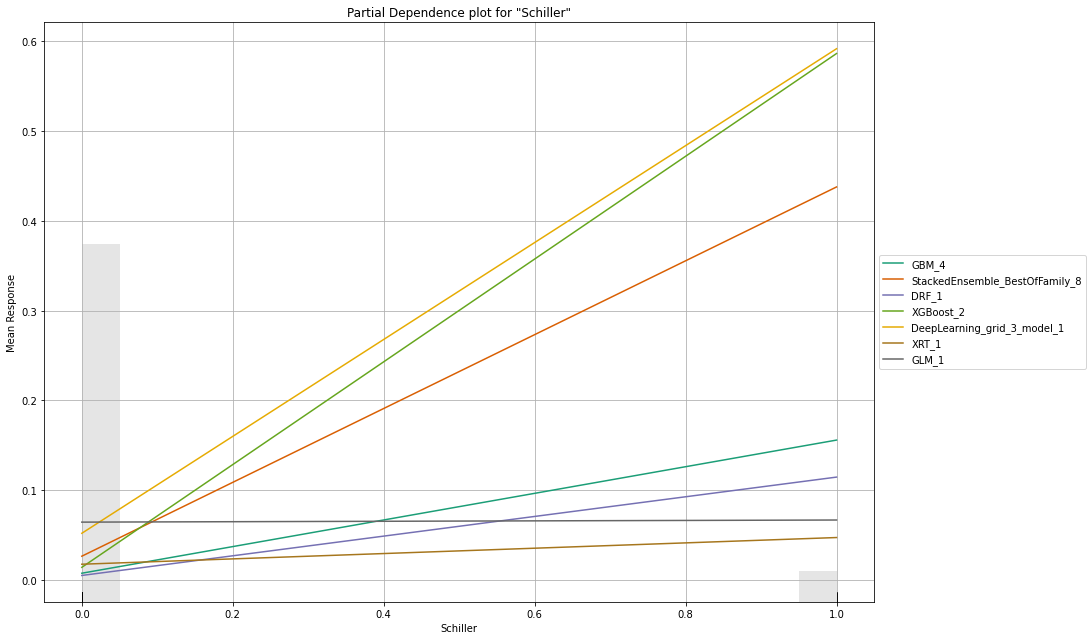

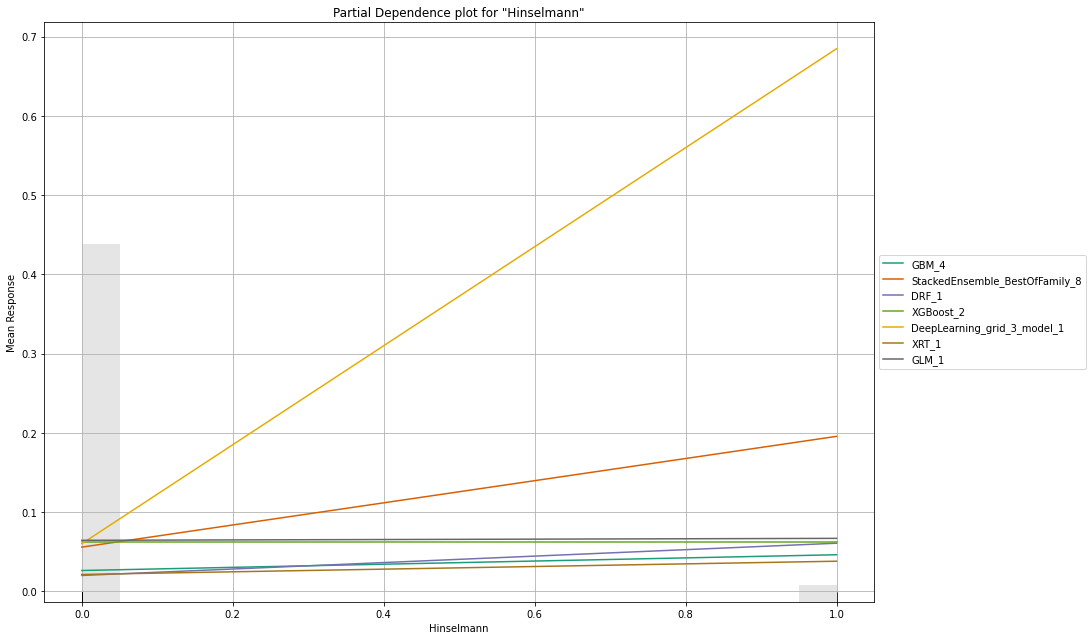

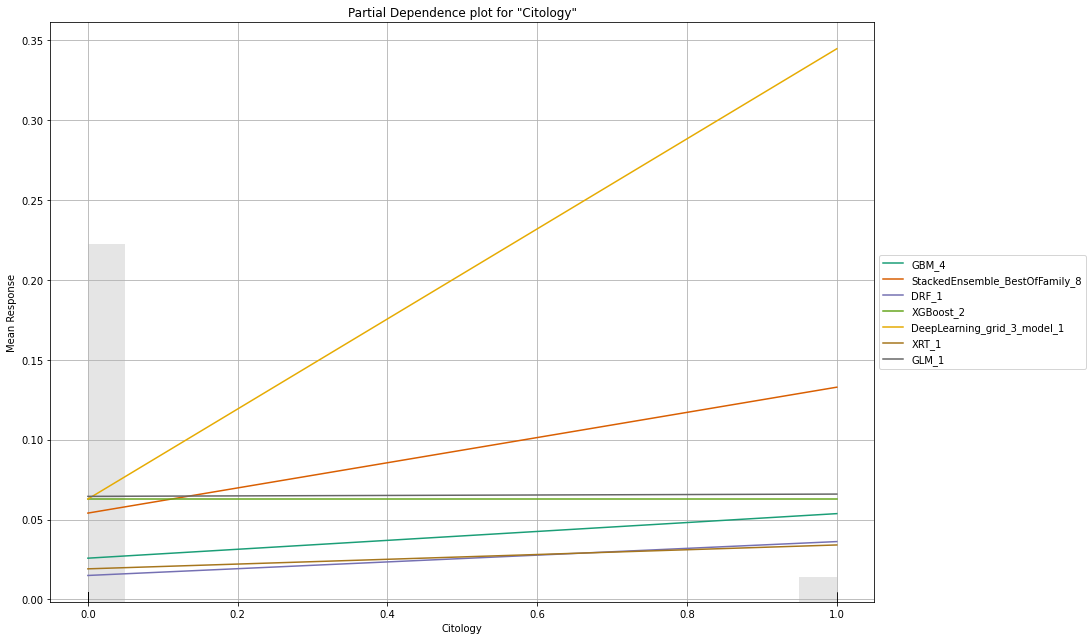

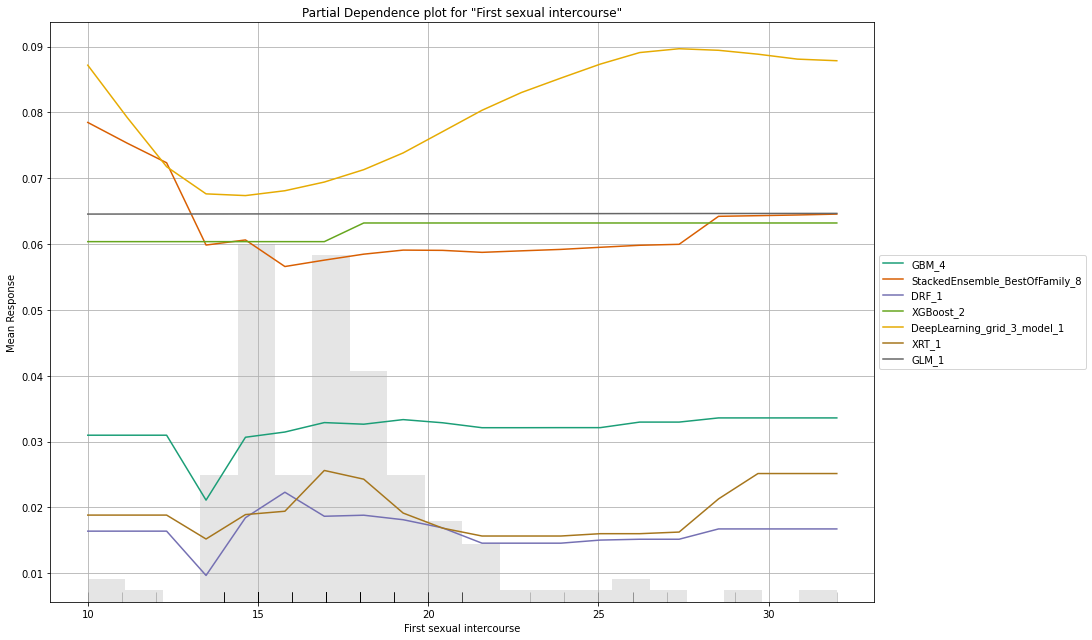

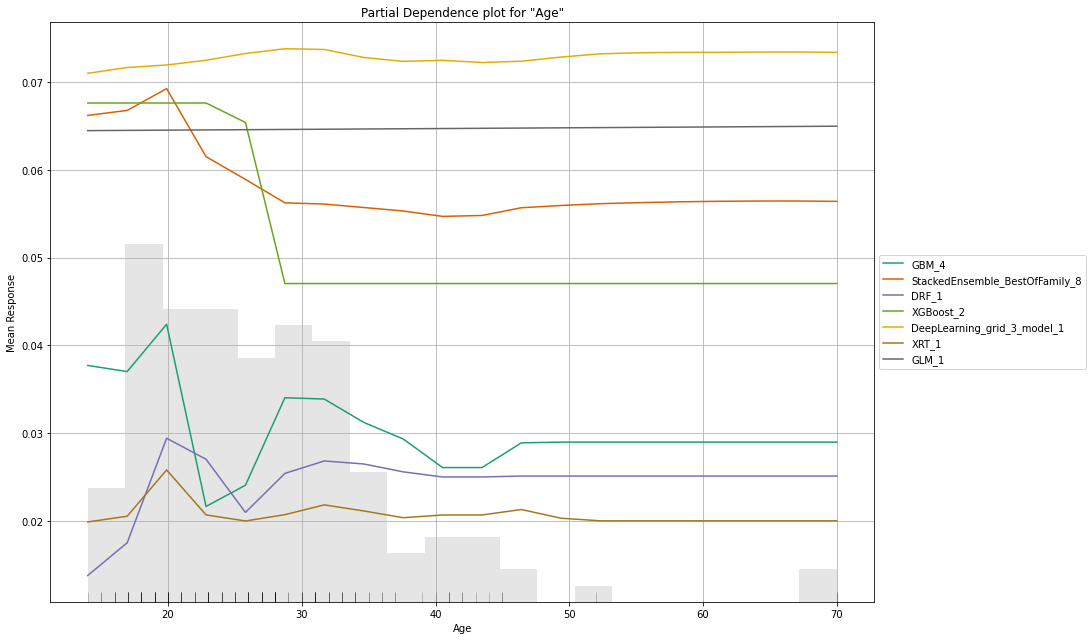

In [50]:
#compare all models
exm = aml.explain(test)

# Metalearner Exploration

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_4_AutoML_2_20211009_225711


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.08124468975451567: 


,,0,1,Error,Rate
0,0,125.0,3.0,0.0234,(3.0/128.0)
1,1,0.0,9.0,0.0,(0.0/9.0)
2,Total,125.0,12.0,0.0219,(3.0/137.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

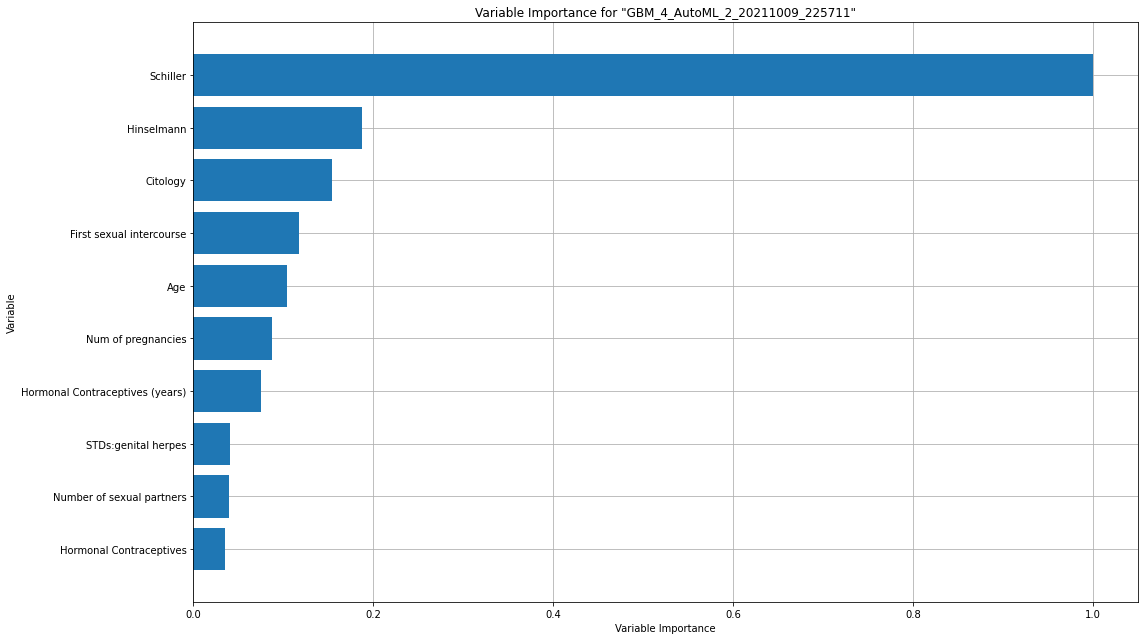

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

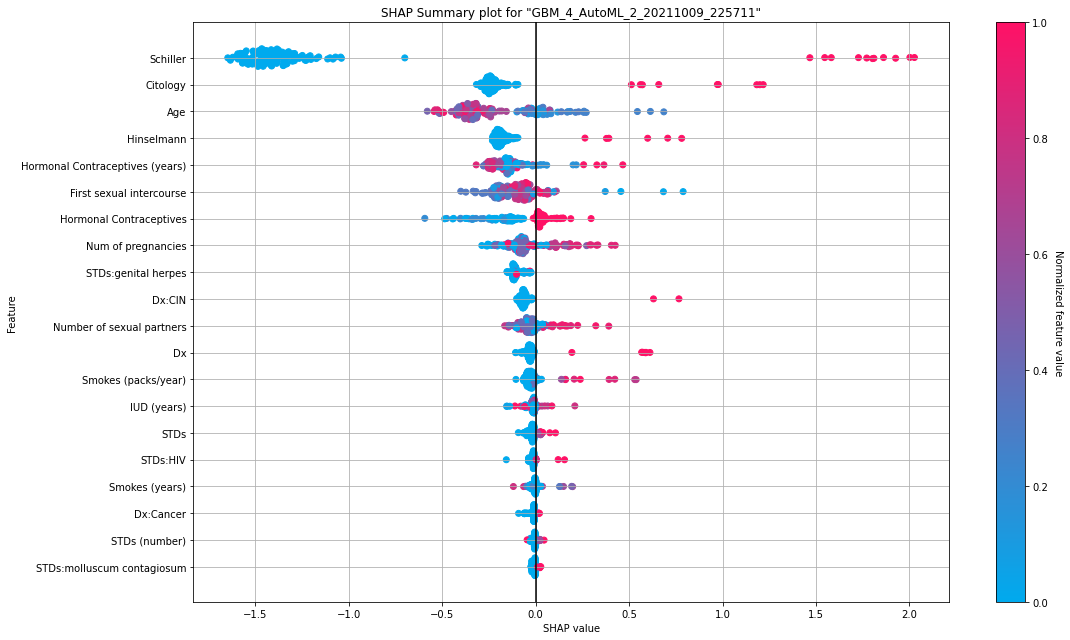

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

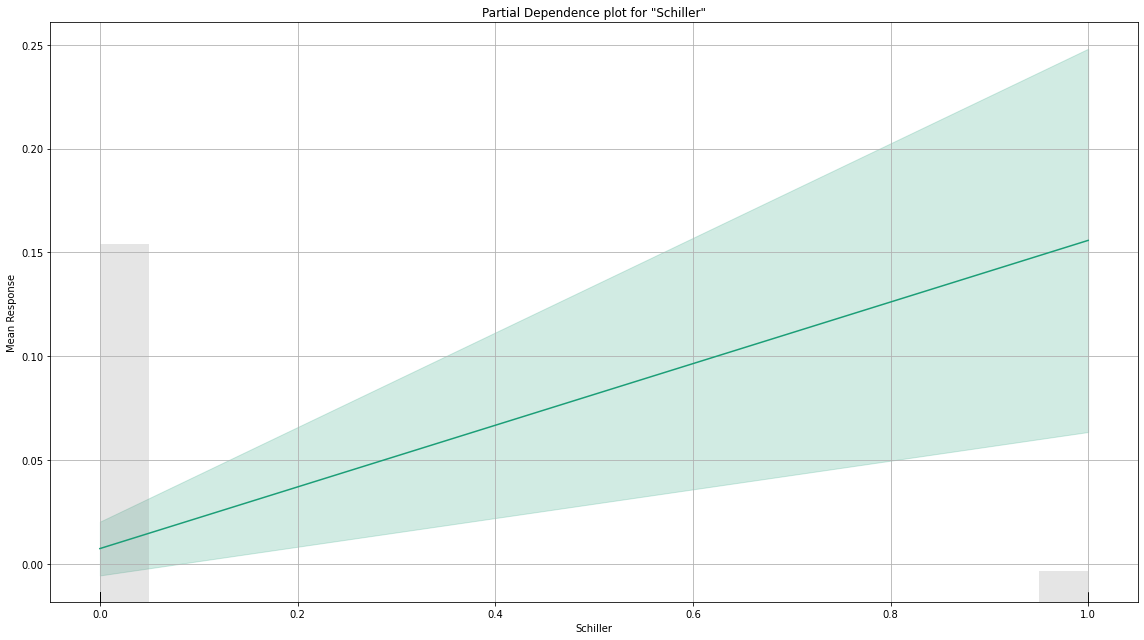

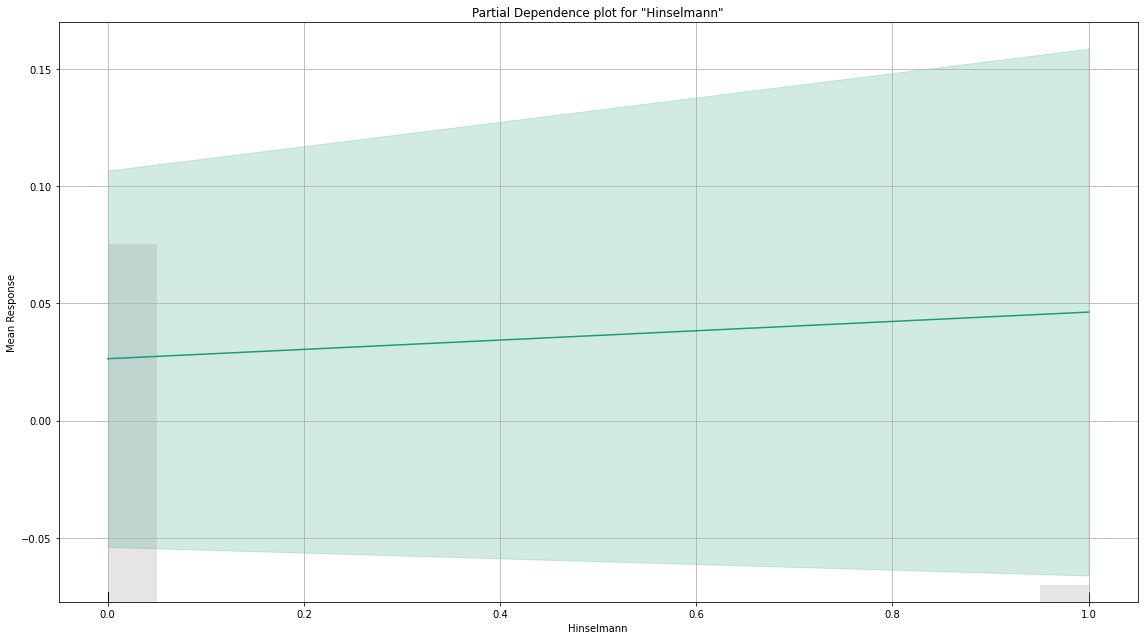

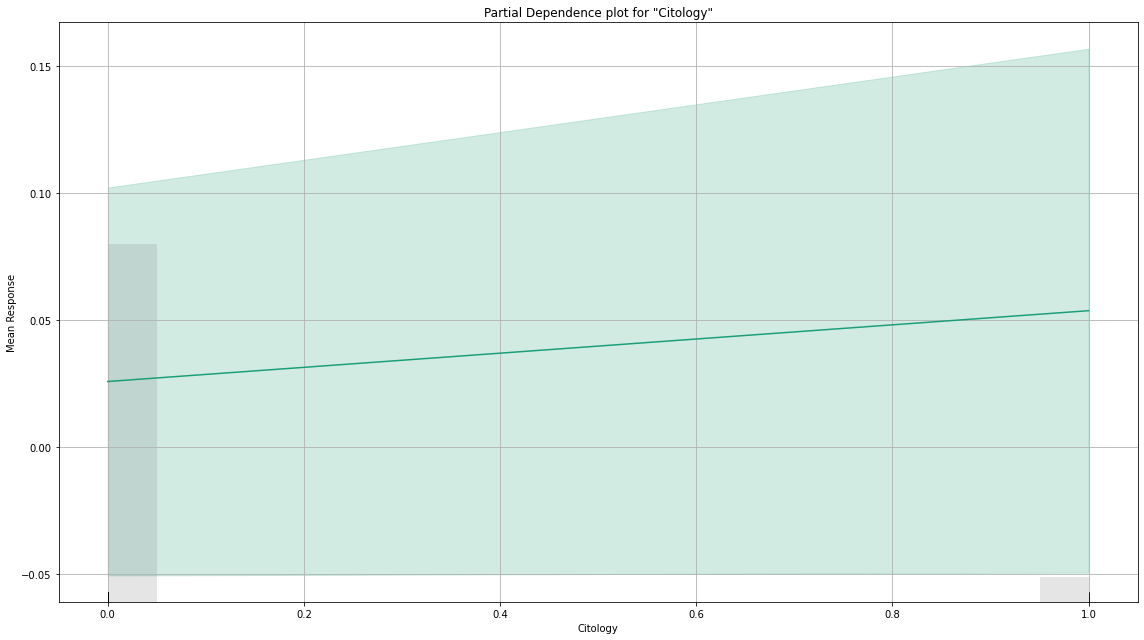

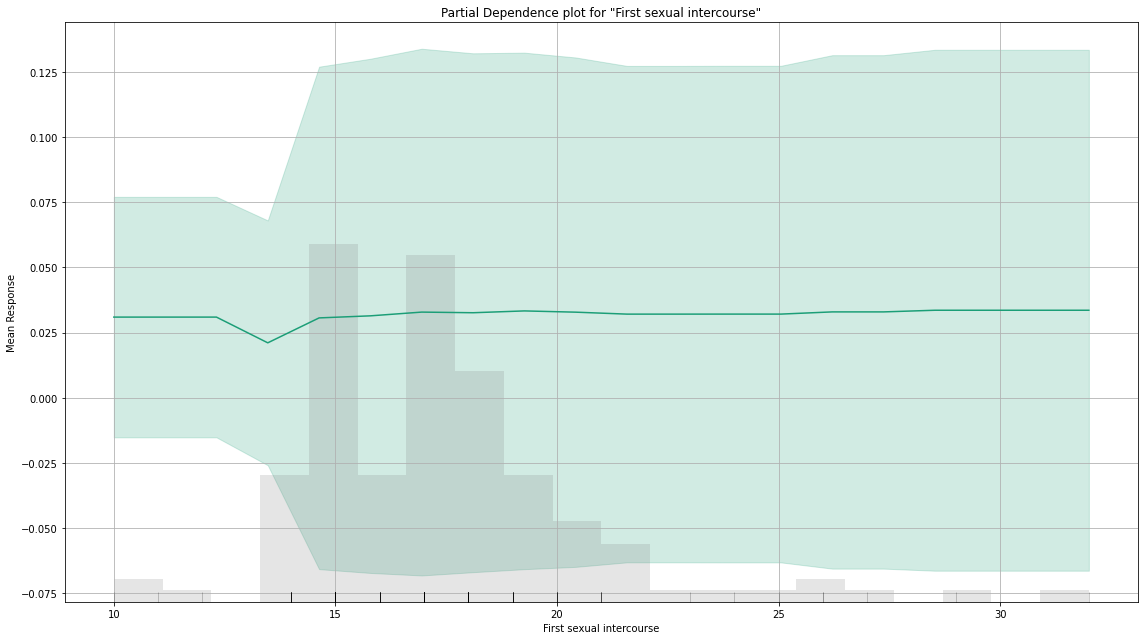

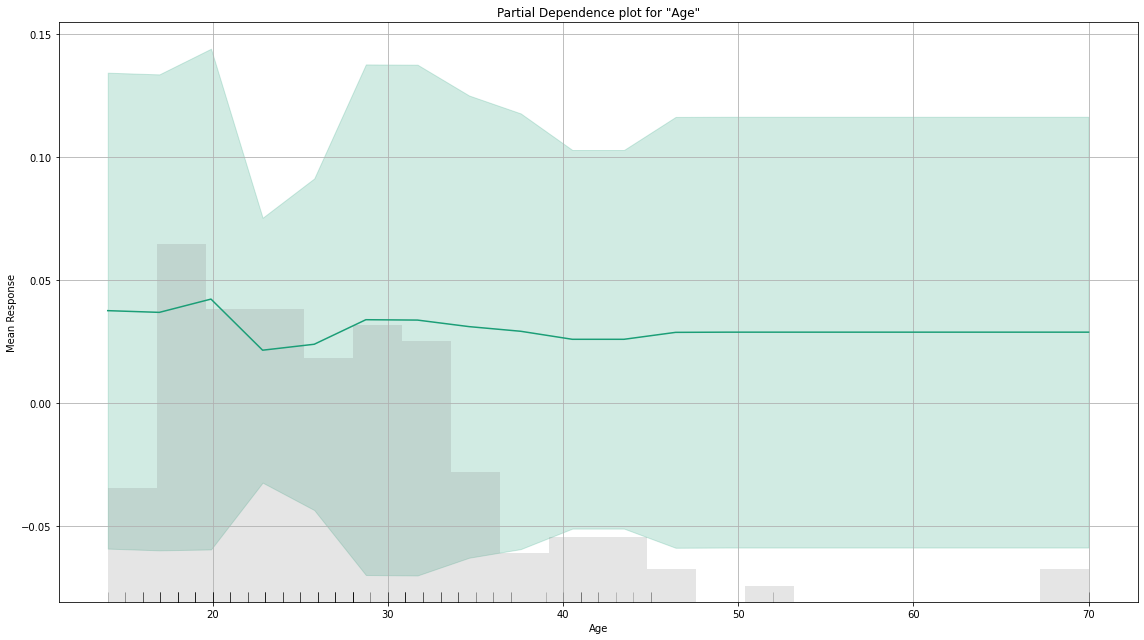

In [51]:
#explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)

In [52]:
#make prediction
preds = aml.leader.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [53]:
#combine the prediction with the test dataset
df = test.cbind(preds)

#preview
df.head(10)

Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,predict,p0,p1
15,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.997023,0.00297722
42,3,23,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.996932,0.00306777
45,4,14,6,0,0,0,1,10,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.972652,0.0273478
43,3,15,8,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.996623,0.00337702
42,2,20,2.27556,0,0,0,1,7,1,6,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.996413,0.0035873
37,6,26,1,0,0,0,1,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.996817,0.00318314
41,3,17,3,0,0,0,1,22,1,0.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.993674,0.00632582
40,2,21,2,0,0,0,1,19,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.992218,0.00778173
36,1,17,4,0,0,0,1,0.25,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.995864,0.00413625
35,5,15,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.994884,0.00511617


In [54]:
df = h2o.as_list(df)

In [55]:
preds = df[['Biopsy', 'predict']].head(20)
preds

,Biopsy,predict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


# Use LIME to explain H2O Models

In [56]:
!pip install lime
import lime
import lime.lime_tabular

In [57]:
feature_names = train.columns[0: -1]
feature_names

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology']

In [125]:
train_features_numpy = train[feature_names].as_data_frame().values
train_features_numpy

array([[18.        ,  4.        , 15.        , ...,  0.        ,
         0.        ,  0.        ],
       [34.        ,  1.        , 16.99529965, ...,  0.        ,
         0.        ,  0.        ],
       [52.        ,  5.        , 16.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [25.        ,  2.        , 17.        , ...,  0.        ,
         0.        ,  1.        ],
       [33.        ,  2.        , 24.        , ...,  0.        ,
         0.        ,  0.        ],
       [29.        ,  2.        , 20.        , ...,  0.        ,
         0.        ,  0.        ]])

In [136]:
#define LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(train_features_numpy, 
                                                   feature_names = feature_names)

In [127]:
idx = 10
test_df = test.as_data_frame()
test_numpy = test_df.iloc[idx].values[0:-1]

In [135]:
test_numpy

array([34.,  3., 19.,  3.,  0.,  0.,  0.,  1.,  5.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [147]:
def findPrediction(instance):
 #instance will be in type of numpy
 df = pd.DataFrame(data = instance, columns = feature_names)
 hf = h2o.H2OFrame(df)
 predictions = aml.leader.predict(hf).as_data_frame()
 
 #here predictions object is 3 columned data frame. 1st column is class prediction and others are probabilities
 #lime needs just prediction probabilities
 
 predictions = predictions.iloc[:,1:].values
 return predictions

In [148]:
exp = explainer.explain_instance(instance_numpy, 
                                 findPrediction, 
                                 num_features = len(feature_names))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [149]:
exp.show_in_notebook(show_table=True, show_all=True)

In [ ]:
from lime import submodular_pick